# Mandatory Assignment 1 - Machine Learning

In [47]:
# All the imports needed for this assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso




# Exercise 1.1 Data Exploration

# Q1.1.1
In the fields below, I have completed the given task:

Load the dataset into a DataFrame and display the first 5 rows.  
Print the dataset information and summary statistics.

In [2]:
# Loading the dataset into a DataFrame.
wine_data = pd.read_csv("WineQT.csv")

# Displaying the first 5 rows of the dataset, since the function head() by default shows 5 rows.
print("First 5 rows of the dataset:")
wine_data.head()

First 5 rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Printing the dataset information.
print("Dataset information:")
wine_data.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
# Printing summary statistics.
print("Summary statistics:")
wine_data.describe()

Summary statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Q1.1.2
The feature with the highest variation based on the summary statistics is the ID, but since this is only an individual identifier in the dataset I'm disregaring the ID.
There feature with the highest variation would therefore be the "total sulfur dioxide".

This is all before scaling the dataset, something that would most likely give a different answear.

# Exercise 1.2 Correlation Analysis

## Q1.2.1
Compute the correlation matrix of all features.

In [5]:
# Computing the correlation matrix of all features
corr_matrix = wine_data.corr()
print("Correlation matrix:")
corr_matrix

Correlation matrix:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


## Q1.2.2
Plot a heatmap of the correlation matrix.

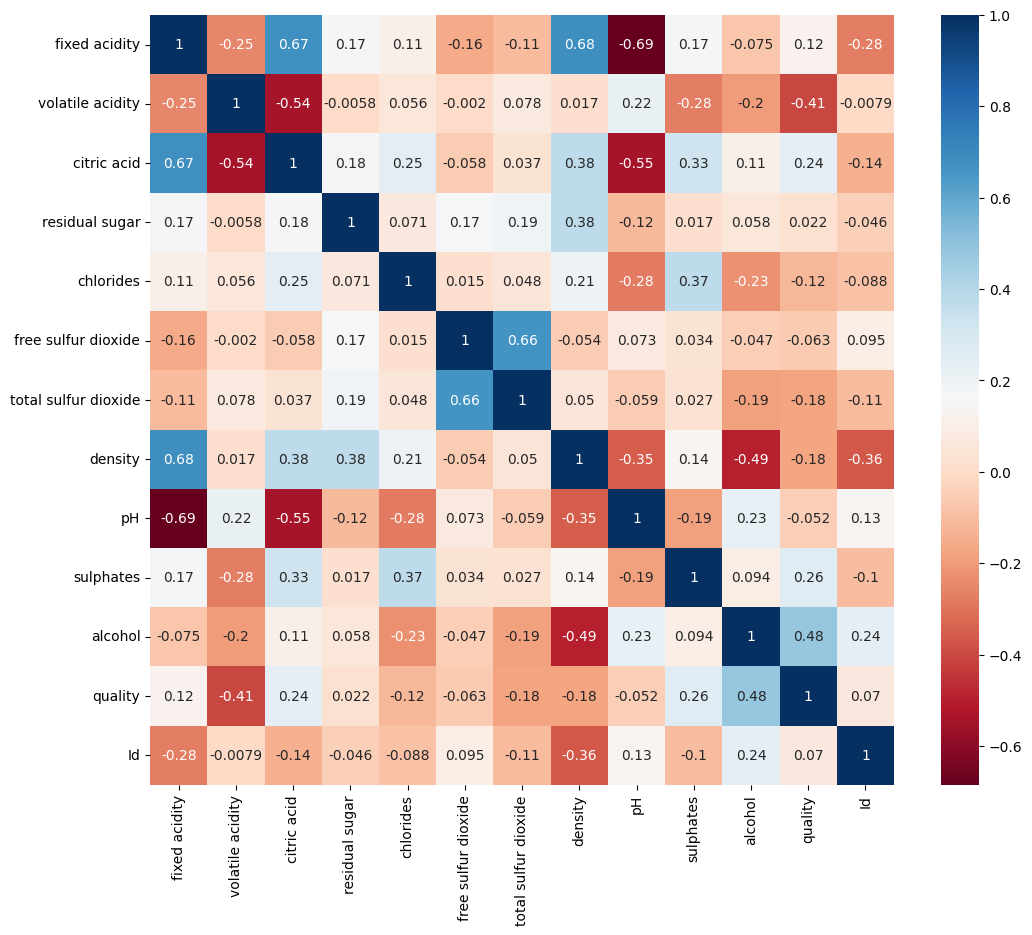

In [6]:
# Plots a heatmap of the correlation matrix using seaborn
# Stronger color towards red and blue indicates higher correlation,
# blue is a positive- and red is a negative correlation.

plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, cmap="RdBu", annot=True)
plt.show()

## Q1.2.3
Which variable has the strongest positive correlation with quality? Which variable
has the strongest negative correlation with quality?

In [7]:
# Creates a correlation matrix with the feature "quality" as the referance.
# Sorting the list of correlations in a descending order.

corr_matrix_quality = corr_matrix["quality"].sort_values(ascending=False)
corr_matrix_quality

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

The feature with the highest positive correlation with quality is alcohol at 0,48 (rounded).
The feature with the highest negative correlation with quality is volatile acidity at -0,41 (rounded).

I'm not taking quality it self into considuration, since it will always have a correlation of 1 with itself.

It is my statement that alcohol is a better indicator for predicting the wine quality. This is because alcohol has a higher absolute value of correlation.  
We are refearing to the absolute value, since it's the magnitude of correlation we're looking at.  
Alcohol has a correlation of (0,48) rounded.  
pH has a correlation of (-0,05) rounded.  
  
When a correlation is higher it indicates that quality in this instance, goes up or down with the other feature. The higher the correlation, the linear the rate of change between the two.  
When the correlation is negativ, it means that the two features goes in opposite direction; when on goes up, the other goes down.  
  
Since alcohol has a higher magnitude of correlation, it will be the best predictor of wine quality of the two.

# 1.3 Linear Regression

## Q1.3.1
Fit a simple linear regression model using gradient descent to predict quality using
only chlorides.

In this task I will be using Stochastic Gradient Descent in the linear reggression.

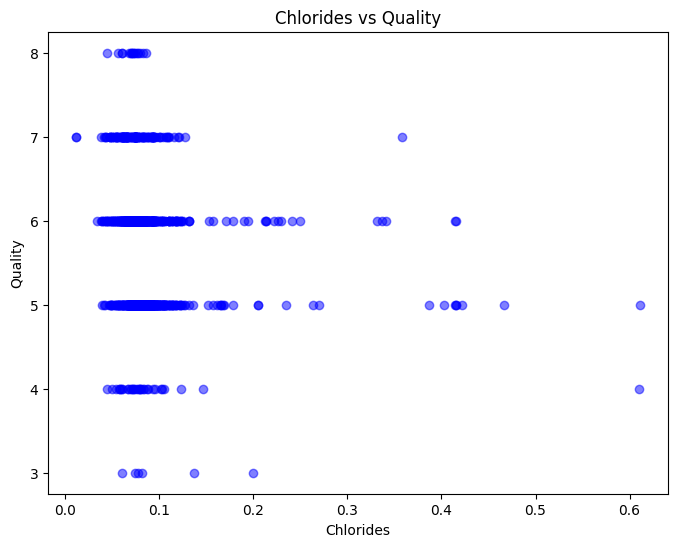

In [8]:
# A figure showing the relationship between "chlorides" and "quality".

x = wine_data[["chlorides"]]  # Feature
y = wine_data["quality"]      # Target

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title("Chlorides vs Quality")
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.show()



Intercept: [5.65444278]
Coefficient: [-0.10118417]


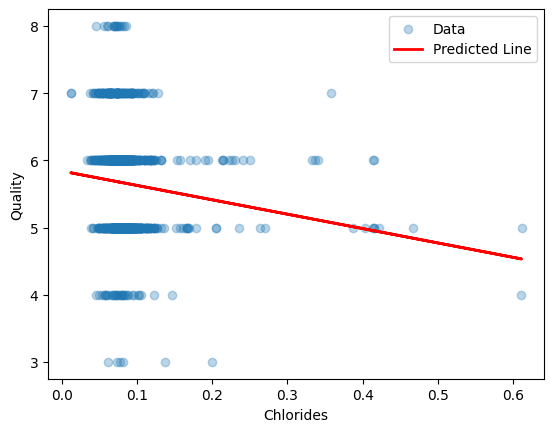

In [9]:
# A simple linear regression model using "chlorides" to predict "quality", using gradient descent.
# Scaling the data before training.

# Feature and target variables
X = wine_data[['chlorides']].values  
y = wine_data['quality'].values      

# Scaling the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear regression with Gradient descent
sgd_reg = SGDRegressor(
    max_iter = 1000,        # Max number of itterations
    tol = 1e-5,             # Stopping point for when improvement gets small
    penalty = None,         # No regulation of the training, just linear regression
    eta0 = 0.01,            # Learning rate
    n_iter_no_change = 100, # 
    random_state = 42       # Setting a number for the randomization for consistancy
)

# Training the model on the provided data
sgd_reg.fit(X_scaled, y)

print("Intercept:", sgd_reg.intercept_)
print("Coefficient:", sgd_reg.coef_)

# Testing the model and its predictions
y_pred = sgd_reg.predict(X_scaled)

plt.scatter(X, y, alpha=0.3, label="Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Predicted Line")
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.legend()
plt.show()


## Q1.3.2
Fit a simple linear regression model predicting quality using only alcohol.

In this task I will only be using a simple linear reggression, since the task does not specify otherwise.

Intercept: 1.8870128607874057
Coefficient: [0.36104097]


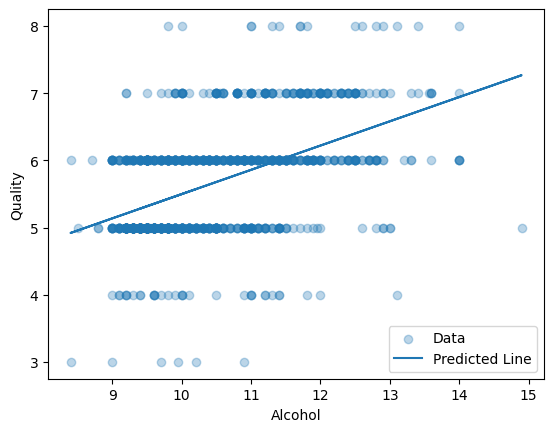

In [10]:
# A simple linear reggression model predicting wine quality using only alcohol.
# This model only uses basic linear regression with sklearn.

# Feature and target
X = wine_data[["alcohol"]].values   # Feature
y = wine_data["quality"].values     # Target

# Scaling the data
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Setting up the model and inputing the data
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Printing the values og intercept and coefficient
print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)

# Prediction from the model
y_pred = lin_reg.predict(X)

# Plotting and showing the ressult

plt.scatter(X, y, alpha=0.3, label="Data")
plt.plot(X, y_pred, label="Predicted Line")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.legend()
plt.show()


## Q1.3.3
Report the regression coefficient and intercept and compare both the models.


Using chlorides produces these values:  
Intercept: 5.65  
Coefficient: -0.10  

Using Alcohol produces these values:  
Intercept: 1.887  
Coefficient: 0.36  
  
The intercept number represent what the quality would be in if the feature where to hypothetical be equal to zero, in a mathematical sense.  
The coefficient represent the rate of change when the feature increases.  
  
What we can see is that chlorides has a small negative effect on the quality of the wine, as the coefficient is -0.10.  
While alcohol has a larger positive effect on quality as the coefficient is 0.36.  
This also confirms that correlation analysis that more alchol increases quality and chlorides decreases quality.  
  
Since alcohol has a much larger absolute value of coeffisient, we can safely assume that alcohol is a stronger indicator for the wine quality.


## Q1.3.4
Plot the regression line against the data points. Does the regression line fit the
data well for chlorides or alcohol? Why or why not?

I have plotted the reggression lines together with their respective code in Q1.3.1 and Q1.3.2.  
  
For chlorides the reggression line does not fit the data well, since we can see that there are very few datapoints as feature goes up. The datapoints indicate the the quality does not seam to be affected by low values of chlorides.  
  
For alcohol the regression line does fit the data in some regard, as it would seems that the quality slightly increases when there is more alcohol. But we can also see that the wine quality is constant at different alcohol values. This can be seen as long, near constant, horizontal lines in the figure. This shows that the datasett has a large spread around the line. Therefore alchol is not a good indicator of quality as a single feature.  
  
Alcohol is a better predictor than chlorides, but still not a very strong predictor on its own. At high chlorides values, quality tends to remain low, which the line captures, but since there are few data points at high values of chlorides, this relationship is less reliable.

# 1.4 Train-Test Split

Split the dataset into training (80%) and test (20%) sets in 5 different folds. Train the
simple linear regression model (using gradient descent) for each split on the train-test
data in each fold. Evaluate the model on the test set in each fold using:  
• Mean Squared Error (MSE)  
• Root Mean Squared Error (RMSE)  
• $R^2$ score

In [27]:
# Doing a Cross Validation with Gradient Descent as the traing type.
# Splitting the data into 5 folds, without a separate test set since the task at hand does not need it.
# Using the features Alcohol and Chlorides, in each their own model, to predict the Quality.
# Each model will be evaluted on MSE, RMSE and R^2
# Will be using sklearn libary.

# The feature and target
X_alcohol = wine_data[["alcohol"]].values   # Feature
X_chlorides = wine_data[["chlorides"]].values  # Feature
y = wine_data["quality"].values     # Target

# Pipeline that scales the data and uses SGDRegressor
pipeline = make_pipeline(StandardScaler(), SGDRegressor(
    max_iter=1000,              # Max number of itterations
    tol=1e-5,                   # Stopping point for when improvement gets small
    penalty=None,               # No regulation of the training,  just linear regression
    eta0=0.01,                  # Learning rate
    random_state=42             # Setting a number for the randomization for consistancy
))

# Creating folds with 5 splits and shuffling the data
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the scores
scoring = {
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

# Performing cross-validation for Alcohol
cv_results = cross_validate(pipeline, X_alcohol, y, cv=cv, scoring=scoring)

# Extracting the scores for Alcohol
mse_scores = -cv_results['test_MSE']  # Negating because sklearn returns negative MSE
rmse_scores = -cv_results['test_RMSE']  # Negating because sklearn returns negative RMSE
r2_scores = cv_results['test_R2']

# Printing the scores for Alcohol
print("Cross-Validation Results for Alcohol:")

print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"R^2 Scores: {r2_scores}\n")

print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R^2: {np.mean(r2_scores)}\n")

print(f"Variance in MSE: {np.var(mse_scores)}")
print(f"Variance in RMSE: {np.var(rmse_scores)}")
print(f"Variance in R^2: {np.var(r2_scores)}\n")

# Performing cross-validation for Chlorides
cv_results = cross_validate(pipeline, X_chlorides, y, cv=cv, scoring=scoring)

# Extracting the scores for Chlorides
mse_scores = -cv_results['test_MSE']  # Negating because sklearn returns negative MSE
rmse_scores = -cv_results['test_RMSE']  # Negating because sklearn returns negative RMSE
r2_scores = cv_results['test_R2']

# Printing the scores for Chlorides
print("Cross-Validation Results for Chlorides:")

print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"R^2 Scores: {r2_scores}\n")

print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R^2: {np.mean(r2_scores)}\n")

print(f"Variance in MSE: {np.var(mse_scores)}")
print(f"Variance in RMSE: {np.var(rmse_scores)}")
print(f"Variance in R^2: {np.var(r2_scores)}\n")


Cross-Validation Results for Alcohol:
MSE Scores: [0.41730971 0.58996566 0.51447612 0.49987638 0.46279561]
RMSE Scores: [0.64599513 0.76809222 0.71726991 0.70701936 0.68029083]
R^2 Scores: [0.25008092 0.19886092 0.24082272 0.26766131 0.213252  ]

Average MSE: 0.4968846958464006
Average RMSE: 0.7037334901292912
Average R^2: 0.23413557402908997

Variance in MSE: 0.0032953433996140815
Variance in RMSE: 0.001643870716847478
Variance in R^2: 0.0006206743088286358

Cross-Validation Results for Chlorides:
MSE Scores: [0.55939428 0.72661809 0.65906773 0.66654065 0.5913166 ]
RMSE Scores: [0.74792665 0.85241896 0.81182987 0.81641941 0.76897113]
R^2 Scores: [-0.00524965  0.01329486  0.02745875  0.02349155 -0.00523241]

Average MSE: 0.6405874688853807
Average RMSE: 0.7995132036860235
Average R^2: 0.01075262010191671

Variance in MSE: 0.0034872617608324536
Variance in RMSE: 0.001366106017091914
Variance in R^2: 0.0001918863693854396



## Q1.4.1
How well does alcohol alone predict wine quality in each split?  
  
Answear:  
Alcohol alone had these result in the 5 folds:  
MSE Scores: [0.41730971 0.58996566 0.51447612 0.49987638 0.46279561]  
RMSE Scores: [0.64599513 0.76809222 0.71726991 0.70701936 0.68029083]  
$R^2$ Scores: [0.25008092 0.19886092 0.24082272 0.26766131 0.213252  ]  
  
With these avrages (rounded):  
RMSE = 0.70  
$R^2$ = 0.23  
  
The model based on alcohol alone, using a SGD linear regression has a avarage missing rate of 0.70 points on the wine quality scale. This meens that the model has some accuracy in predicting the wine quality.  
Since the $R^2$ is as low as 0.23 the model is not very good at explaining the variance in the data, but this number indicates that alchole is a weak but relevant indicator for wine quality.

# Q1.4.2
How well does chloride alone predict wine quality in each split?  
  
Answear:  
Chloride had these results in the 5 folds:  
MSE Scores: [0.55939428 0.72661809 0.65906773 0.66654065 0.5913166 ]  
RMSE Scores: [0.74792665 0.85241896 0.81182987 0.81641941 0.76897113]  
R^2 Scores: [-0.00524965  0.01329486  0.02745875  0.02349155 -0.00523241]  
  
With these avrages (rounded):  
RMSE = 0.80  
$R^2$ = 0.01  
  
Chloride alone is not a good predictor of the wine quality. On average it misses more than alcohol, with its RMSE of 0.80. In addition to that, chloride has a $R^2$ of 0.01. This means that the model based on chloride guesses most of the time, since it can't explain almost any of the variance in the data.

# Q1.4.3
Do you think the model underfits? Why?  
  
Answear:  
Yes, the models underfit the data. This is because predicting the wine quality is to complex for only one feature. This is something we can observe for both cholrine and alcohol. They both have a higher miss rate (the RMSE) of 0.8 and 0.7, combined with low $R^2$ where chlorine is as low as 0.01. This means that the model cannot explain the variance in the data, something that indicates underfitting.

# Q1.4.4
Provide the mean and variance from the 5 different folds and comment on the
variation in performance across all 5 folds when using alcohol versus chloride.  
  
Answear:  
The cross validation gave the following average and variance from the 5 folds.  
  
Alcohol:  
Average MSE: 0.4968846958464006  
Average RMSE: 0.7037334901292912  
Average R^2: 0.23413557402908997  
  
Variance in MSE: 0.0032953433996140815  
Variance in RMSE: 0.001643870716847478  
Variance in R^2: 0.0006206743088286358  
  
Chloride:  
Average MSE: 0.6405874688853807  
Average RMSE: 0.7995132036860235  
Average R^2: 0.01075262010191671  
    
Variance in MSE: 0.0034872617608324536  
Variance in RMSE: 0.001366106017091914  
Variance in R^2: 0.0001918863693854396  
  
Both models have low variance throughout the folds. This indicates that the their performance is stable in predicting the wine quality - regardless of how well they actually predict the wine quality.  
Alcohol is however the better indicator and model since it has a higher $R^2$ and lower RMSE.

# Q1.5 Multiple Linear Regression

## Q1.5.1
 Train a multiple linear regression model using all features to predict quality using
the same splits as used in previous question. Evaluate the model on the test set
using MSE, RMSE, and $R^2$.

In [34]:
# Feature set and target
# Use all columns except 'quality' (target) and 'Id' (identifier)
# 'Id' is excluded as it does not provide useful information for prediction.
X_all = wine_data.drop(columns=["quality", "Id"]).values
y = wine_data["quality"].values

# Pipeline: scale -> SGDRegressor (linear regression trained via gradient descent)
pipeline = make_pipeline(
    StandardScaler(),
    SGDRegressor(
        max_iter=1000,          # Max number of iterations
        tol=1e-5,               # Early stopping tolerance
        penalty=None,           # No regularization (pure linear regression)
        eta0=0.01,              # Learning rate
        random_state=42         # Reproducibility
    )
)

# 5-fold CV (~80/20 per fold with shuffling)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Scoring: sklearn returns negative errors for "neg_*" metrics
scoring = {
    "MSE":  "neg_mean_squared_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2":   "r2"
}

# Creating folds with 5 splits and shuffling the data
cv_results = cross_validate(pipeline, X_all, y, cv=cv, scoring=scoring, return_train_score=False)

# Extract scores
mse_scores  = -cv_results["test_MSE"]   # Negating because sklearn returns negative MSE
rmse_scores = -cv_results["test_RMSE"]  # Negating because sklearn returns negative RMSE
r2_scores   =  cv_results["test_R2"]

# Print per-fold results
print("Cross-Validation Results for ALL Features (excluding 'Id'):")
print(f"MSE Scores : {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"R^2 Scores : {r2_scores}\n")

# Print mean and variance across folds
print(f"Average MSE : {np.mean(mse_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R^2 : {np.mean(r2_scores)}\n")

print(f"Variance in MSE : {np.var(mse_scores)}")
print(f"Variance in RMSE: {np.var(rmse_scores)}")
print(f"Variance in R^2 : {np.var(r2_scores)}\n")

Cross-Validation Results for ALL Features (excluding 'Id'):
MSE Scores : [0.38180171 0.48274008 0.43443618 0.40984542 0.37747691]
RMSE Scores: [0.61790105 0.69479499 0.65911773 0.6401917  0.6143915 ]
R^2 Scores : [0.31388995 0.34446703 0.35893219 0.39956024 0.35829295]

Average MSE : 0.41726005884917994
Average RMSE: 0.6452793937642853
Average R^2 : 0.35502847233724155

Variance in MSE : 0.0014955244600244613
Variance in RMSE: 0.0008745628323762657
Variance in R^2 : 0.0007625791272672873



When using all the features to train the linear regression model, using SGD, we see an improvment in the scores.  
Average RMSE is 0.65 and $R^2$ is 0.36 (both rounded). This tells us that the model has increased its performance, since it now has a lower error rate (RMSE) when predicting the wine quality and the $R^2$ has increased to 0.36.  
The variance has also decresed, something that indicates that the model also is more stable in its predictions.  
  
But since the $R^2$ still is so low, relativ speaking. The model is not usable to predict wine quality even with all features, using only a linear regression model.

## Q1.5.2
Compare the results of simple vs multiple regression in terms of MSE, RMSE, and
R2.

When comparing the results of simple linear regression (with only one feature) and multiple linear regression (with all features), we can observe the following (All numbers are rounded):

Alcohol (single feature): Average RMSE = 0.70, $R^2$ = 0.23

Chlorides (single feature): Average RMSE = 0.80, $R^2$ = 0.01

All features (multiple features): Average RMSE = 0.65, $R^2$ = 0.36

This shows that the multiple regression model performs better than the simple models: it has a lower error (RMSE) and explains more variance in wine quality ($R^2$). However, the improvement is still modest, and the model underfits since most of the variance in wine quality remains unexplained.

## Q1.5.3
Provide comparison plots for multiple versus simple linear regression solved in previous exercise. At-least one of the following plots among (i) Cost vs Iteration,
(optimization) (ii) Parameter Convergence (coefficients) (iii) Predicted vs Actual
(performance) and (iv) Residuals Plot (assumptions check) should be provided.

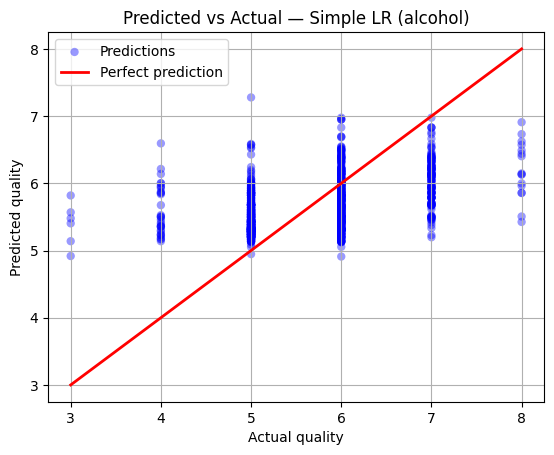

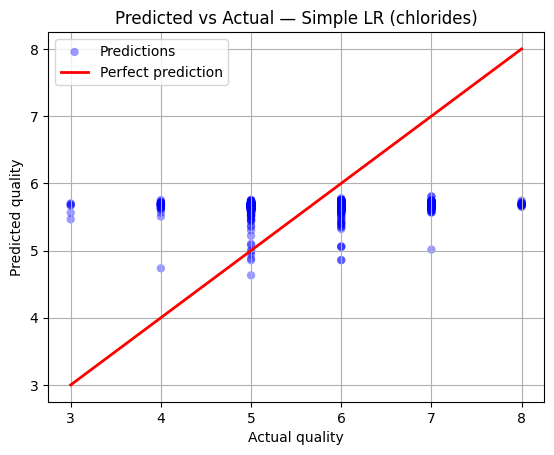

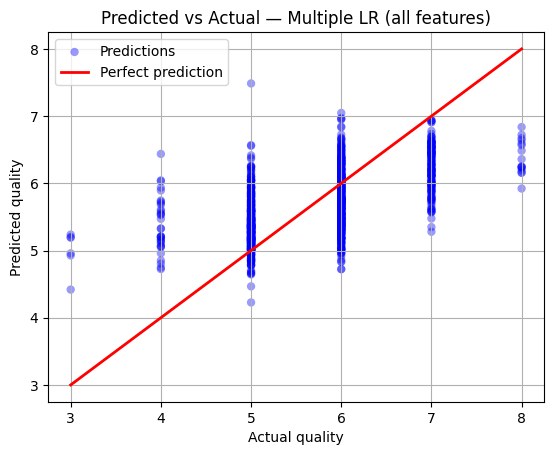

In [38]:
# Q1.5.3 – Comparison Plot (Predicted vs Actual)
# We only need one of the required plots, so we will use Predicted vs Actual.
# This plot shows how well the model predictions match the actual wine quality.
# This block is self-contained and does not depend on earlier code.

# Feature sets
X_alcohol   = wine_data[["alcohol"]].values
X_chlorides = wine_data[["chlorides"]].values
X_all       = wine_data.drop(columns=["quality", "Id"]).values
y           = wine_data["quality"].values

# Pipeline: scale + linear regression with SGD
pipeline = make_pipeline(
    StandardScaler(),
    SGDRegressor(
        max_iter=1000,
        tol=1e-5,
        penalty=None,
        eta0=0.01,
        random_state=42
    )
)

# Cross-validation setup: 5 folds with shuffling
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to plot Predicted vs Actual
def predicted_vs_actual(X, y, title):

    # Get out-of-fold predictions
    y_pred = cross_val_predict(pipeline, X, y, cv=cv)

    # Scatter plot of actual vs predicted
    plt.figure()
    plt.scatter(y, y_pred, alpha=0.4, color="blue", edgecolor="none", label="Predictions")

    # Diagonal line for perfect prediction
    y_min, y_max = y.min(), y.max()
    plt.plot([y_min, y_max], [y_min, y_max], color="red", linewidth=2, label="Perfect prediction")

    plt.xlabel("Actual quality")
    plt.ylabel("Predicted quality")
    plt.title(f"Predicted vs Actual — {title}")
    plt.grid(True)
    plt.legend()
    plt.show()

# Run plots for each model
predicted_vs_actual(X_alcohol, y, "Simple LR (alcohol)")
predicted_vs_actual(X_chlorides, y, "Simple LR (chlorides)")
predicted_vs_actual(X_all, y, "Multiple LR (all features)")

In the plots provided by the code above, we can see the predicted vs actual values, with a diagonal line showing what would be a perfect prediction. The blue dots are what the models predict.  
In the two singe feature models, the predictions are spread alot away from the diagonal line, with alcohol having a slightly closer fit. While the model built with all the features have an even better fit around the line.  
All the models does although have a considreable spread away from the line, that increases with lower and higher quality values. This indicates that a linear regreasion model does not suffice in predicting wine quality, even if using all the features does increas the precision.

## Q1.5.4
Which model performs better and why?

The model trained with all the features performs better. This is seen in both the scores disscused in previus tasks and the plots provided here.  
But even though the multiple regression model performs better, it still has a $R^2$ score as low as 0.36. This means that the model is still not able to calcuate and take into account the varianse in the data, and is a clear indicator that the model underfits the data. 

# 2 Exercise-2

## Q2.1
Which features are most suitable/influential in predicting wine quality? (Tip - You
can consider feature importance ranking.)

In [41]:
# Q2.1 – Feature importance
# In this task we identify which features are most influential in predicting wine quality.
# This is done in two ways:
#   (1) A linear regression model with scaling, where the absolute coefficient values 
#       indicate the influence of each feature.
#   (2) A Random Forest model, where the feature_importances_ attribute shows the 
#       contribution of each feature to reducing prediction error.
# Both models are trained on all features (excluding 'quality' and 'Id'), and the top 10 
# features are printed for each method.

# Features and target
feature_cols = [c for c in wine_data.columns if c not in ["quality", "Id"]]
X = wine_data[feature_cols].values
y = wine_data["quality"].values

# (1) Linear model with scaling
lin_model = make_pipeline(StandardScaler(), LinearRegression())
lin_model.fit(X, y)

lin_importance = pd.DataFrame({
    "feature": feature_cols,
    "abs_coef": np.abs(lin_model[-1].coef_)
}).sort_values("abs_coef", ascending=False)

print("\n[Q2.1] Linear model – top 10 by |coef|:")
print(lin_importance.head(10))

# (2) Random Forest
rf = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
rf.fit(X, y)

rf_importance = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\n[Q2.1] Random Forest – top 10 by feature_importances_:")
print(rf_importance.head(10))


[Q2.1] Linear model – top 10 by |coef|:
                 feature  abs_coef
10               alcohol  0.303037
1       volatile acidity  0.202735
9              sulphates  0.149068
6   total sulfur dioxide  0.091256
4              chlorides  0.080705
8                     pH  0.063923
0          fixed acidity  0.040133
7                density  0.033576
2            citric acid  0.025924
5    free sulfur dioxide  0.024277

[Q2.1] Random Forest – top 10 by feature_importances_:
                 feature  importance
10               alcohol    0.286363
9              sulphates    0.137305
1       volatile acidity    0.130313
6   total sulfur dioxide    0.072300
8                     pH    0.059703
4              chlorides    0.057110
0          fixed acidity    0.054441
2            citric acid    0.054038
7                density    0.051413
3         residual sugar    0.049962


# Q2.1
Which features are most suitable/influential in predicting wine quality?

Answer:  
Using a linear regression model with standardized features, the most influential were:  
- Alcohol (0.30)  
- Volatile acidity (0.20)  
- Sulphates (0.15)  
- Total sulfur dioxide (0.09)  
- Chlorides (0.08)  

Using a Random Forest model, the most important features were:  
- Alcohol (0.29)  
- Sulphates (0.14)  
- Volatile acidity (0.13)  
- Total sulfur dioxide (0.07)  
- pH (0.06)  

Both methods highlight alcohol as the strongest predictor of wine quality, followed by sulphates and volatile acidity.
The rankings differ slightly, which indicates that Random Forest captures more non-linear effects that a linear model is not able to.

## Q2.2
 The models you trained so far assume a linear relationship between features and
target.  
a) Polynomial regression: Extend the feature space to include quadratic or
interaction terms. Does this improve performance?  
b) Regularization: Train models using Ridge and Lasso regression. How do
these methods affect the coefficients and model generalization?  
c) Model comparison: Compare your linear regression results to a non-linear
model (e.g., Decision Tree or Random Forest). Which performs better, and
why?

## a)

In [43]:
# Q2.2a – Polynomial regression
# Extend the feature space to include quadratic and interaction terms.
# Then train a linear regression model using all features to predict wine quality.
# Evaluate with 5-fold CV on MSE, RMSE, and R². Compare later to standard multiple regression.

# Features and target (all except 'quality' and 'Id')
feature_cols = [c for c in wine_data.columns if c not in ["quality", "Id"]]
X = wine_data[feature_cols].values
y = wine_data["quality"].values

# Pipeline: polynomial expansion -> scaling -> linear regression
poly_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

# 5-fold CV with shuffling
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metrics
scoring = {
    "MSE": "neg_mean_squared_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2": "r2"
}

# Cross-validation
cv_results = cross_validate(poly_pipeline, X, y, cv=cv, scoring=scoring)

# Extract results
mse_scores = -cv_results["test_MSE"]
rmse_scores = -cv_results["test_RMSE"]
r2_scores = cv_results["test_R2"]

# Print results
print("Cross-Validation Results for Polynomial Regression (degree=2):")
print(f"MSE Scores : {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"R^2 Scores : {r2_scores}\n")

print(f"Average MSE : {np.mean(mse_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R^2 : {np.mean(r2_scores)}\n")

print(f"Variance in MSE : {np.var(mse_scores)}")
print(f"Variance in RMSE: {np.var(rmse_scores)}")
print(f"Variance in R^2 : {np.var(r2_scores)}")

Cross-Validation Results for Polynomial Regression (degree=2):
MSE Scores : [0.40017516 0.4879     0.47320376 0.40808759 0.49422794]
RMSE Scores: [0.63259399 0.69849839 0.68789807 0.63881733 0.70301347]
R^2 Scores : [0.28087227 0.33746015 0.30172552 0.40213553 0.15981734]

Average MSE : 0.45271889022692735
Average RMSE: 0.6721642528898437
Average R^2 : 0.29640216168797084

Variance in MSE : 0.001626627786018963
Variance in RMSE: 0.0009141073639654846
Variance in R^2 : 0.0063580462356960365


## Q2.2a – Polynomial regression (degree = 2)  
(All numbers are rounded)

Extending the feature space with quadratic and interaction terms did not improve performance. 
Compared to the standard multiple linear regression (RMSE = 0.65, $R^2$ = 0.36), the polynomial model achieved RMSE = 0.67 and $R^2$ = 0.30 on 5-fold CV. 
The variance across folds was also larger for $R^2$, indicating less stable performance.

This suggests that the added polynomial terms increased model complexity without capturing useful signal.

## b)

In [46]:
# Q2.2b – Ridge and Lasso regression
# Train models using Ridge and Lasso regression with all features.
# Evaluate with 5-fold CV on MSE, RMSE, and R².
# Compare the results to standard linear regression.

# Features and target (all except 'quality' and 'Id')
feature_cols = [c for c in wine_data.columns if c not in ["quality", "Id"]]
X = wine_data[feature_cols].values
y = wine_data["quality"].values

# 5-fold CV with shuffling
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metrics
scoring = {
    "MSE": "neg_mean_squared_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2": "r2"
}

# --- Ridge Regression ---
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

ridge_results = cross_validate(ridge_pipeline, X, y, cv=cv, scoring=scoring)

ridge_mse = -ridge_results["test_MSE"]
ridge_rmse = -ridge_results["test_RMSE"]
ridge_r2 = ridge_results["test_R2"]

print("Cross-Validation Results for Ridge Regression:")
print(f"MSE Scores : {ridge_mse}")
print(f"RMSE Scores: {ridge_rmse}")
print(f"R^2 Scores : {ridge_r2}\n")

print(f"Average MSE : {np.mean(ridge_mse)}")
print(f"Average RMSE: {np.mean(ridge_rmse)}")
print(f"Average R^2 : {np.mean(ridge_r2)}\n")

# --- Lasso Regression ---
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.001, max_iter=10000))

lasso_results = cross_validate(lasso_pipeline, X, y, cv=cv, scoring=scoring)

lasso_mse = -lasso_results["test_MSE"]
lasso_rmse = -lasso_results["test_RMSE"]
lasso_r2 = lasso_results["test_R2"]

print("Cross-Validation Results for Lasso Regression:")
print(f"MSE Scores : {lasso_mse}")
print(f"RMSE Scores: {lasso_rmse}")
print(f"R^2 Scores : {lasso_r2}\n")

print(f"Average MSE : {np.mean(lasso_mse)}")
print(f"Average RMSE: {np.mean(lasso_rmse)}")
print(f"Average R^2 : {np.mean(lasso_r2)}\n")

Cross-Validation Results for Ridge Regression:
MSE Scores : [0.37988141 0.48408666 0.4299687  0.41025691 0.37834256]
RMSE Scores: [0.6163452  0.69576337 0.65571998 0.640513   0.61509557]
R^2 Scores : [0.3173408  0.34263844 0.36552455 0.39895738 0.35682136]

Average MSE : 0.41650724716002346
Average RMSE: 0.6446874252192346
Average R^2 : 0.3562565069189063

Cross-Validation Results for Lasso Regression:
MSE Scores : [0.3790314  0.48407145 0.42987144 0.41056054 0.37831385]
RMSE Scores: [0.61565526 0.69575243 0.65564582 0.64074998 0.61507223]
R^2 Scores : [0.31886829 0.3426591  0.36566807 0.39851255 0.35687017]

Average MSE : 0.4163697354226425
Average RMSE: 0.6445751451389289
Average R^2 : 0.35651563583579066



## Q2.2b – Ridge and Lasso regression  
(All numbers are rounded)

Using Ridge regression, the model achieved RMSE = 0.65 and $R^2$ = 0.36.  
Using Lasso regression, the model achieved RMSE = 0.65 and $R^2$ = 0.36.  

Both results are almost identical to the standard multiple linear regression model.  
This shows that regularization did not improve performance in this case, since the dataset does not seem to suffer strongly from overfitting.  

Theoretically, Ridge shrinks all coefficients but keeps them in the model, while Lasso can push some coefficients to exactly zero, effectively performing feature selection. 
With the chosen alpha values, neither method had a strong effect on the coefficients or performance.

## c)

In [48]:
# Q2.2c – Random Forest (non-linear model)
# Train a RandomForestRegressor on all features (except 'quality' and 'Id').
# Evaluate with 5-fold CV on MSE, RMSE, and R².
# Compare to the multiple linear regression results.

# Features and target
feature_cols = [c for c in wine_data.columns if c not in ["quality", "Id"]]
X = wine_data[feature_cols].values
y = wine_data["quality"].values

# 5-fold CV with shuffling (same as before)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metrics
scoring = {
    "MSE": "neg_mean_squared_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2": "r2"
}

# Random Forest model (non-linear)
rf = RandomForestRegressor(
    n_estimators=400,     # more trees for stability
    max_depth=None,       # let trees grow; we rely on ensemble to generalize
    random_state=42,
    n_jobs=-1
)

# Cross-validation
rf_results = cross_validate(rf, X, y, cv=cv, scoring=scoring)

# Extract results
rf_mse  = -rf_results["test_MSE"]
rf_rmse = -rf_results["test_RMSE"]
rf_r2   =  rf_results["test_R2"]

# Print results
print("Cross-Validation Results for Random Forest:")
print(f"MSE Scores : {rf_mse}")
print(f"RMSE Scores: {rf_rmse}")
print(f"R^2 Scores : {rf_r2}\n")

print(f"Average MSE : {np.mean(rf_mse)}")
print(f"Average RMSE: {np.mean(rf_rmse)}")
print(f"Average R^2 : {np.mean(rf_r2)}\n")

print(f"Variance in MSE : {np.var(rf_mse)}")
print(f"Variance in RMSE: {np.var(rf_rmse)}")
print(f"Variance in R^2 : {np.var(rf_r2)}")


Cross-Validation Results for Random Forest:
MSE Scores : [0.29998687 0.41470892 0.38650502 0.32622596 0.32317843]
RMSE Scores: [0.54771057 0.64397898 0.62169528 0.57116194 0.56848784]
R^2 Scores : [0.46091387 0.43684938 0.42966093 0.52206605 0.45059985]

Average MSE : 0.35012104094844093
Average RMSE: 0.5906069224920237
Average R^2 : 0.46001801438262235

Variance in MSE : 0.0018611406100496456
Variance in RMSE: 0.0013045040529416176
Variance in R^2 : 0.0010795603364808653


# Q2.2c – Non-linear model (Random Forest)

Using a Random Forest model the results improved compared to multiple linear regression.  
The model achieved RMSE = 0.59 and $R^2$ = 0.46 (averages across 5 folds).  

This shows that the Random Forest can capture non-linear patterns and interactions between features that a linear regression model cannot.  
The variance across folds was also low, which means the model performance is stable.  

Compared to the linear regression model (RMSE = 0.65, $R^2$ = 0.36), the Random Forest performs better and gives a more accurate prediction of wine quality.
